<a href="https://colab.research.google.com/github/ProfAI/tf00/blob/master/7%20-%20Transfer%20Learning/pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelli pre-addestrati - InceptionV3
Tensorflow ci da la possibilità di importare modelli pre-addestrati per problemi specifici, pronti per essere utilizzati per eseguire predizioni. In questo notebook vedremo come importare una rete neurale [InceptionV3](https://cloud.google.com/tpu/docs/inception-v3-advanced) addestrata sull'[imagenet](http://www.image-net.org/), un dataset di centinaia di migliaia di immagini divise in 1000 classi.


## Importiamo i Moduli

In [ ]:
import tensorflow as tf
import numpy as np

## Importiamo l'InceptionV3
Per importare la rete pre-addestrata possiamo utilizzare il moduli *applications* di tf.keras. Spcifichiamo come parametri la dimensione dell'input e se includere o meno gli strati di input e output.

In [ ]:
model = tf.keras.applications.InceptionV3(input_shape = (299, 299, 3), include_top=True)
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 149, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 149, 149, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 149, 149, 32) 0           batch_normalization_282[0][0]    
_______________________________________________________________________________________

## Eseguiamo predizioni
La rete è già addestrata, quindi possiamo utilizzarla per eseguire predizioni, prima scarichiamo le classi di imagenets.

In [ ]:
from urllib.request import urlopen

def load_labels():
  url = "https://raw.githubusercontent.com/Lasagne/Recipes/master/examples/resnet50/imagenet_classes.txt"
  label_text = urlopen(url).read().decode('utf-8')
  labels = label_text.split("\n")
  return labels

labels = load_labels()

Ora definiamo una funzione per eseguire le predizioni partendo da degli url di immagini, per scaricare le immagini ci servirem di skimage.

In [ ]:
from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt

def recognize_img_from_url(url, labels=None, show_image=False):

  img = io.imread(url)

  if(show_image):
    plt.imshow(img)

  img = resize(img, (299, 299))
  img = np.expand_dims(img, axis=0)
  pred_proba = model.predict(img)[0]
  pred = np.argmax(pred_proba, axis=0)

  if(labels!=None):
    print("Class prediction: "+labels[pred])
  else:
    print("Class index prediction: "+str(pred))

Class prediction: Egyptian cat


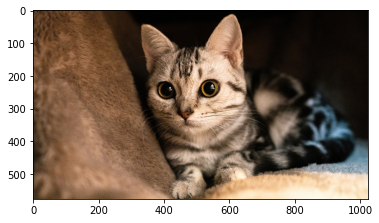

In [ ]:
url = "https://news.cgtn.com/news/77416a4e3145544d326b544d354d444d3355444f31457a6333566d54/img/37d598e5a04344da81c76621ba273915/37d598e5a04344da81c76621ba273915.jpg"
recognize_img_from_url(url, labels=labels, show_image=True)

Class prediction: sports car, sport car


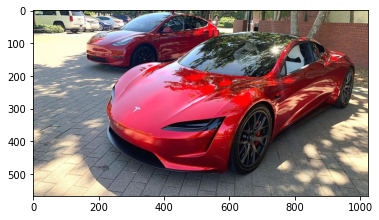

In [ ]:
url = "https://www.vaielettrico.it/wp-content/uploads/roadster-1.jpg"
recognize_img_from_url(url, labels=labels, show_image=True)

Class prediction: beer glass


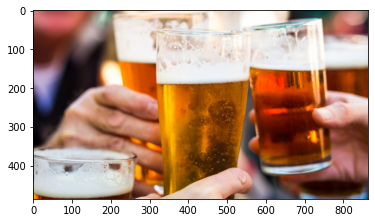

In [ ]:
url = "https://inteng-storage.s3.amazonaws.com/img/iea/yrwQq25awN/sizes/healthy-beer-gut_md.jpg"
recognize_img_from_url(url, labels=labels, show_image=True)

Class prediction: thatch, thatched roof


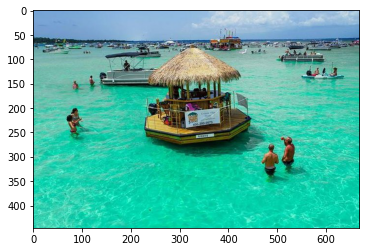

In [ ]:
url = "https://media.tacdn.com/media/attractions-splice-spp-674x446/07/11/71/cb.jpg"
recognize_img_from_url(url, labels=labels, show_image=True)

Ovviamente se il soggetto di un'immagine non è contenuto all'interno del imagenets, la nostra rete non può riconoscerlo.

Class prediction: beaver


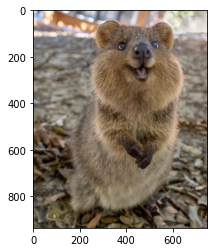

In [ ]:
url = "https://pbs.twimg.com/media/EbQhFGKXkAg7H9Z.jpg"
recognize_img_from_url(url, labels=labels, show_image=True)